# Loading Important Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import string, nltk, re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [2]:
nltk.download("stop words")

[nltk_data] Error loading stop words: Package 'stop words' not found
[nltk_data]     in index


False

# Loading Dataset

In [3]:
data=pd.read_csv('sentiment_analysis.csv')

In [4]:
data

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram
...,...,...,...,...,...,...,...
494,2015,10,18,night,"According to , a quarter of families under six...",negative,Twitter
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
497,2018,8,10,night,congratulations ! you guys finish a month ear...,positive,Twitter


# Exploratory Data Analysis

In [5]:
data.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [6]:
data.columns

Index(['Year', 'Month', 'Day', 'Time of Tweet', 'text', 'sentiment',
       'Platform'],
      dtype='object')

In [7]:
data['Year']

0      2018
1      2018
2      2017
3      2022
4      2022
       ... 
494    2015
495    2021
496    2022
497    2018
498    2019
Name: Year, Length: 499, dtype: int64

In [8]:
data.shape

(499, 7)

In [9]:
data.size

3493

In [10]:
data.tail(10)

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
489,2021,11,30,morning,thats another sponsor,neutral,Instagram
490,2023,1,22,noon,And most of us are going to be stuck in an of...,negative,Twitter
491,2023,1,24,night,No it`s not sad. Should make you proud,negative,Instagram
492,2023,1,27,morning,"Sorry, we`ll try to keep it down.",negative,Facebook
493,2023,3,3,noon,is home alone.. Doing hw,neutral,Instagram
494,2015,10,18,night,"According to , a quarter of families under six...",negative,Twitter
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram
496,2022,5,30,noon,uploading all my bamboozle pictures of facebook,neutral,Facebook
497,2018,8,10,night,congratulations ! you guys finish a month ear...,positive,Twitter
498,2019,3,25,morning,"actually, I wish I was back in Tahoe. I miss...",negative,Instagram


In [11]:
data['Time of Tweet'].value_counts()

Time of Tweet
morning    171
noon       167
night      161
Name: count, dtype: int64

In [12]:
data['sentiment'].value_counts()

sentiment
neutral     199
positive    166
negative    134
Name: count, dtype: int64

In [13]:
data[data['Time of Tweet']=='morning']

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
6,2017,12,28,morning,2 am feedings for the baby are fun when he is ...,positive,Facebook
9,2018,5,28,morning,Today first time I arrive in the boat. Its ama...,positive,Facebook
12,2016,5,15,morning,My Sharpie is running DANGERously low on ink,negative,Facebook
...,...,...,...,...,...,...,...
486,2023,3,22,morning,"back soon, need to run to the shops and cut th...",neutral,Twitter
489,2021,11,30,morning,thats another sponsor,neutral,Instagram
492,2023,1,27,morning,"Sorry, we`ll try to keep it down.",negative,Facebook
495,2021,2,25,morning,the plan to not spend money is not going well,negative,Instagram


In [14]:
data.describe()

,Year,Month,Day
count,499.000000,499.000000,499.000000
mean,2020.394790,6.084168,15.693387
std,2.830991,3.652711,8.804673
min,2010.000000,1.000000,1.000000
25%,2019.000000,2.000000,8.000000
50%,2021.000000,6.000000,15.000000
75%,2023.000000,9.000000,22.000000
max,2023.000000,12.000000,31.000000


<function matplotlib.pyplot.show(close=None, block=None)>

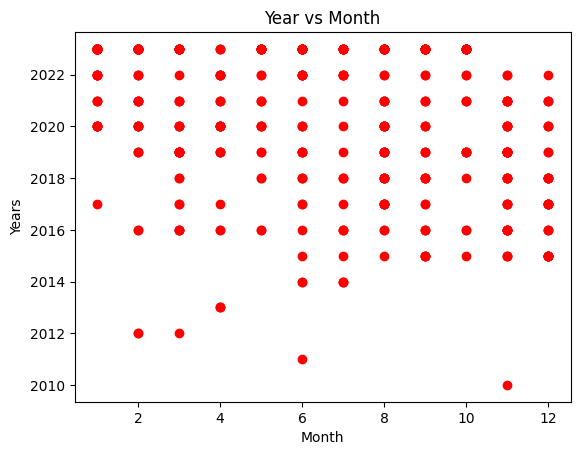

In [15]:
plt.scatter(data['Month'],data['Year'],color='red')
plt.title("Year vs Month")
plt.xlabel("Month")
plt.ylabel("Years")
plt.show

In [16]:
data[(data['Year'] == 2012) & (data['Month'] == 2)]

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
145,2012,2,18,night,Really great football match,positive,Facebook
239,2012,2,18,night,I love this youtube tutorial,positive,Facebook


In [17]:
data[(data['Year'] == 2014) & (data['Month'] == 6)]

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
43,2014,6,3,noon,I`d rather do the early run..but I am a morni...,neutral,Twitter
109,2014,6,3,noon,I`d rather do the early run..but I am a morni...,neutral,Twitter


In [18]:
data[['Time of Tweet','Platform']]

,Time of Tweet,Platform
0,morning,Twitter
1,noon,Facebook
2,night,Facebook
3,morning,Facebook
4,noon,Instagram
...,...,...
494,night,Twitter
495,morning,Instagram
496,noon,Facebook
497,night,Twitter


In [19]:
data.isnull()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
494,False,False,False,False,False,False,False
495,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False


In [20]:
data.isnull=='True'

False

# Data Preprocessing

In [21]:
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def preprocess(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+", '', text)
    text = re.sub(r'\@w+|\#','', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

data['clean_text'] = data['text'].apply(preprocess)

# Sentiment Distribution and Word cloud

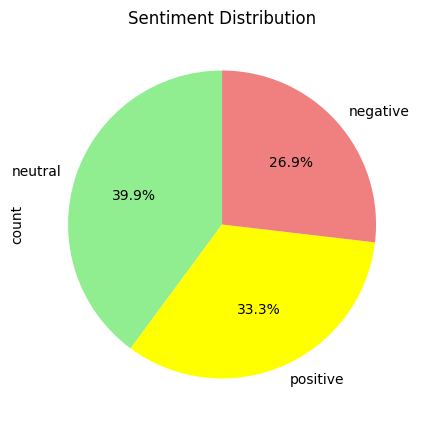

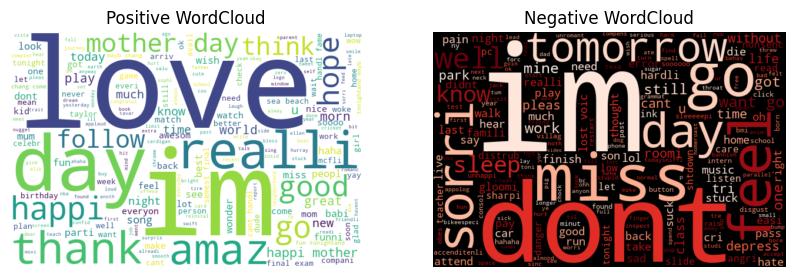

In [22]:
plt.figure(figsize=(5, 5))
data['sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen','yellow', 'lightcoral'], startangle=90)
plt.title("Sentiment Distribution")
plt.show()

# WordClouds for Positive and Negative
positive_text = " ".join(data[data['sentiment'] == 'positive']['clean_text'])
negative_text = " ".join(data[data['sentiment'] == 'negative']['clean_text'])

wc_pos = WordCloud(width=600, height=400, background_color='white').generate(positive_text)
wc_neg = WordCloud(width=600, height=400, background_color='black', colormap='Reds').generate(negative_text)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(wc_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Positive WordCloud")

plt.subplot(1, 2, 2)
plt.imshow(wc_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Negative WordCloud")
plt.show()

# T-F IDF Model

In [23]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['clean_text'])
y = data['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6
Confusion Matrix:
 [[13 22  1]
 [ 0 27  3]
 [ 0 14 20]]

Classification Report:
               precision    recall  f1-score   support

    negative       1.00      0.36      0.53        36
     neutral       0.43      0.90      0.58        30
    positive       0.83      0.59      0.69        34

    accuracy                           0.60       100
   macro avg       0.75      0.62      0.60       100
weighted avg       0.77      0.60      0.60       100



# Prediction

In [24]:
pred_data = pd.DataFrame({
    "Original Text": data.iloc[y_test.index]['text'].values,
    "Actual Sentiment": y_test.values,
    "Predicted Sentiment": y_pred
})
pred_data.to_csv("Sentiment_predictions.csv", index=False)
print("Predictions saved to 'Sentiment_predictions.csv")

Predictions saved to 'Sentiment_predictions.csv
